## Modifying the picture with opencv and numpy libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
!wget -q https://github.com/AlexeyAB/darknet/releases/download/yolov4/yolov7.weights 

In [4]:
!wget -q https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov7.cfg

In [5]:
net = cv2.dnn.readNetFromDarknet('yolov7.cfg', 'yolov7.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)

In [6]:
yolo_model = cv2.dnn_DetectionModel(net)
yolo_model.setInputParams(size=(1280, 1280), scale=1 / 255, swapRB=True)

**Just run the above cells without any changes**

In [9]:
"""
Please read the provided image in RGB with opencv lib and print the matrices

see bellow links:
https://numpy.org/doc/stable/reference/generated/numpy.maximum.html
https://numpy.org/doc/stable/reference/generated/numpy.minimum.html
https://numpy.org/doc/stable/reference/generated/numpy.mean.html
"""

# image = ...
bgr_img = cv2.imread('Q5.png')
b,g,r = cv2.split(bgr_img)       # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb

# image = rgb_img
image = bgr_img

print("The dimensions of the image are:")
print(rgb_img.shape)
print("data type of image elements:")
print(rgb_img.dtype)
print("data type of image:")
print(type(rgb_img))
print("data type of image[0]:")
print(type(rgb_img[0]))
print("data type of image[0][0]:")
print(type(rgb_img[0][0]))
print("data type of image[0][0][0]:")
print(type(rgb_img[0][0][0]))
print("maximum pixel:")
print(np.max(rgb_img))
# print(np.maximum(rgb_img))
print("minimum pixel:")
print(np.min(rgb_img))
# print(np.minimum(rgb_img))
print("mean of pixels:")
print(np.mean(rgb_img))

print("---------------")

wanted_matrix = rgb_img[:,:,0] # channel0
channel0 = rgb_img[:,:,0] # channel0
print("The dimensions of the image[:,:,0] (channel 0 in rgb format) image are:")
print(wanted_matrix.shape)
print("data type of channel_0 elements:")
print(rgb_img.dtype)
print("data type of channel_0:")
print(type(wanted_matrix)) 
print("data type of channel_0[0]:")
print(type(rgb_img[0]))
print("data type of channel_0[0][0]:")
print(type(rgb_img[0][0]))
print("data type of channel_0[0][0][0]:")
print(type(rgb_img[0][0][0]))
print("maximum in channel_0:")
print(np.max(wanted_matrix))
# print(np.maximum(rgb_img))
print("minimum in channel_0:")
print(np.min(wanted_matrix))
# print(np.minimum(rgb_img))
print("mean in channel_0:")
print(np.mean(wanted_matrix))


The dimensions of the image are:
(721, 1281, 3)
data type of image elements:
uint8
data type of image:
<class 'numpy.ndarray'>
data type of image[0]:
<class 'numpy.ndarray'>
data type of image[0][0]:
<class 'numpy.ndarray'>
data type of image[0][0][0]:
<class 'numpy.uint8'>
maximum pixel:
255
minimum pixel:
0
mean of pixels:
139.98719468688319
---------------
The dimensions of the image[:,:,0] (channel 0 in rgb format) image are:
(721, 1281)
data type of channel_0 elements:
uint8
data type of channel_0:
<class 'numpy.ndarray'>
data type of channel_0[0]:
<class 'numpy.ndarray'>
data type of channel_0[0][0]:
<class 'numpy.ndarray'>
data type of channel_0[0][0][0]:
<class 'numpy.uint8'>
maximum in channel_0:
255
minimum in channel_0:
10
mean in channel_0:
139.17862475246346


In [12]:

#### Just run this cell 


CONFIDENCE_THRESHOLD = 0.2
NMS_THRESHOLD = 0.4 

classes, scores, boxes = yolo_model.detect(image, CONFIDENCE_THRESHOLD, NMS_THRESHOLD)

detections = [(box, score) for classid, score, box in zip(classes, scores, boxes)]

In [13]:
print("length of detections: ", len(detections))
detections
boxes
scores
classes # [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        # 0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,
        # 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  7, 17, 17, 25]

length of detections:  49


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3, 11, 25, 25, 28],
      dtype=int32)

the result of the detection is classes of each object, 
confidence of predicting the class of that object and parameters of the bounding box

for every bounding box, we have bellow information:

x_min: the x coordinate of the left up corner of the bounding box

y_min: the y coordinate of the left up corner of the bounding box

w: the width of the bounding box

h: the height of the bounding box

In [14]:
### please print the details of the detections

detections # array of (array([786, 497,  70,  79], dtype=int32), 0.91122717) # (box, score) 

#looping through all detected objects and printing their coordinates and confidence level
i = 0  
for detection in detections:  
    (x_min, y_min, w, h) = detection[0] # box
    confidence = detection[1] # score
 
    print("Object detected at x_min={}, y_min={}, width={}, height={} with {}% confidence and class={}".format(x_min, y_min, w, h, confidence, classes[i]))  

    i += 1


Object detected at x_min=912, y_min=634, width=58, height=86 with 0.9171572327613831% confidence and class=0
Object detected at x_min=783, y_min=383, width=42, height=82 with 0.9002619385719299% confidence and class=0
Object detected at x_min=712, y_min=390, width=33, height=89 with 0.8785350322723389% confidence and class=0
Object detected at x_min=1000, y_min=105, width=17, height=34 with 0.8591136336326599% confidence and class=0
Object detected at x_min=744, y_min=385, width=32, height=81 with 0.8549011945724487% confidence and class=0
Object detected at x_min=794, y_min=497, width=62, height=79 with 0.8065704703330994% confidence and class=0
Object detected at x_min=140, y_min=317, width=32, height=76 with 0.7626901268959045% confidence and class=0
Object detected at x_min=164, y_min=349, width=24, height=49 with 0.6349918246269226% confidence and class=0
Object detected at x_min=1044, y_min=0, width=8, height=9 with 0.611725389957428% confidence and class=0
Object detected at x_m

In [24]:
def visualize(frame, detections):
  """
  Draw all bounding boxes on the main original image and show the result
  Then save result with result.png name

  see the bellow links:
  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
  https://www.geeksforgeeks.org/python-opencv-cv2-imwrite-method/
  """

  ########################################
  ########### YOUR CODES GO HERE #########
  
  # generated_img = ....
  for detection in detections:  
    (x_min, y_min, w, h) = detection[0] # box
    # confidence = detection[1] # score

    #drawing a rectangle around each detected object  
    cv2.rectangle(frame, (x_min,y_min), (x_min+w, y_min+h), (255, 0 , 0), 2) # https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html   
      
  #showing the output image with rectangles around detected objects    
  plt.imshow(cv2.cvtColor(frame ,cv2.COLOR_BGR2RGB))
  cv2.imwrite("result.png", frame)

  return frame

  ########################################

array([[[126, 147, 144],
        [113, 136, 132],
        [152, 175, 171],
        ...,
        [154, 191, 189],
        [154, 191, 189],
        [154, 191, 187]],

       [[128, 149, 146],
        [128, 149, 146],
        [149, 172, 168],
        ...,
        [154, 191, 189],
        [153, 190, 188],
        [154, 191, 187]],

       [[135, 156, 153],
        [156, 177, 174],
        [148, 171, 167],
        ...,
        [153, 190, 188],
        [153, 190, 188],
        [153, 190, 186]],

       ...,

       [[122, 121, 107],
        [122, 121, 107],
        [123, 122, 108],
        ...,
        [139, 142, 140],
        [138, 141, 139],
        [139, 142, 140]],

       [[123, 122, 108],
        [124, 123, 109],
        [124, 123, 109],
        ...,
        [139, 142, 140],
        [139, 142, 140],
        [139, 142, 140]],

       [[123, 122, 108],
        [123, 122, 108],
        [123, 122, 108],
        ...,
        [138, 141, 139],
        [137, 140, 138],
        [137, 140, 138]]

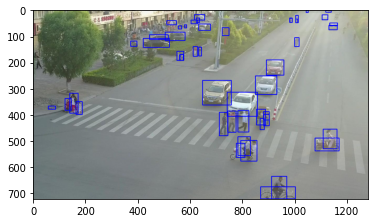

In [25]:
visualize(image, detections)

In [26]:
# Check if file has been saved or not
!(ls result.png && echo yes) || echo no

result.png
yes
